# **Case_study : Suppliers analysis**

## Introduction
**CM** is a fictitious European company selling outdoor clothing with retail stores in three countries: Germany, France, and Italy. CM also has a strong online presence. The company’s website offers customers the ability to purchase their products online, with home delivery available for added convenience. In addition to their website, CM also sells their products through various online platforms, such as Amazon and other e-commerce marketplaces. This allows CM to reach a wider audience and connect with customers who prefer to shop online.

The company was founded by a group of friends who were passionate about the outdoors and wanted to make quality outdoor clothing and sporting equipment more accessible to everyone.

The first store opened in Germany, and it was an instant success. The store was filled with high-quality outdoor clothing and equipment that was both stylish and functional. The founders of CM believe that people should be able to enjoy the outdoors without sacrificing style or comfort.

CM quickly expanded to other European countries, opening stores in France, and Italy. Each store has a unique style and atmosphere that reflects the local culture and environment. The stores are more than just retail spaces; they are community hubs where outdoor enthusiasts can come together to share their passion for adventure.

## Suppliers and challenges
As a European company selling outdoor clothing and sporting equipment, CM sources their products from various suppliers across the globe. CM works closely with its suppliers to ensure that the materials and manufacturing processes used to create their products meet their high standards for quality.

**TalonCotex**, a textile company based in Asia, is one of CM’s main suppliers. They specialize in producing high-quality fabrics that are ideal for outdoor clothing and running gear. Their fabrics are known for being breathable, moisture-wicking, making them an excellent choice for outdoor enthusiasts.

Another important supplier for CM is a sporting equipment manufacturer, **Thundra**, based in Europe. This company produces a range of equipment, from hiking and camping gear to skiing and snowboarding equipment. CM collaborates with this supplier to develop innovative equipment that is both functional and stylish.

CM also sources products from smaller, specialized suppliers, such as manufacturers of climbing gear or outdoor clothing. These suppliers often have a unique focus or expertise that allows CM to offer a wider range of products to their customers.

In recent months, CM has been struggling with some of their suppliers. Despite their best efforts to maintain strong relationships with their suppliers and ensure timely delivery of products, CM has been receiving **incomplete shipments** or **shipments that arrived well after the promised delivery date**.

This has caused some disruption to their supply chain and made it difficult for CM to meet the demands of their customers. Customers who had placed orders were receiving incomplete shipments, which led to frustration and dissatisfaction. Some customers even cancelled their orders altogether, which was a **loss for the company**.

## Objectives
The objective of this session is to identify potential risks and vulnerabilities in CM’s suppliers’ management:

- What is the global trend of CM business?
- To which extent CM is depending on certain suppliers? What profitability can CM expect from them?
- Are CM’s suppliers reliable when it comes to meeting delivery deadlines? Are there periods of the year when delivery performance is affected by external events?
- Are CM’s suppliers always providing high-quality products that meet CM’s needs and standards?
The session will be structured in 3 steps:

1. We will start with a general overview of the suppliers’ situation   
2. We will draw conclusions from this first approach and consider the limitations of our analysis  
3. We will engage in even more in-depth observations

Useful definitions :

*Supplier Leadtime*: The Supplier Leadtime refers to the time it takes to get a Purchase Order delivered by a Supplier. It can be defined as *Purchase Order Reception Date – Purchase Order Order Date*    
*Margin*: Measures how much profit is generated by a sale. It is defined as *Sellprice – BuyPrice*

## Part 1 : Suppliers overview - Basic analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import *
import seaborn as sns

In [3]:
items = pd.read_csv("Items.tsv",sep="\t")
po = pd.read_csv("Purchase Orders.tsv",sep="\t")
po.rename(columns={"LokadNetAmount":"NetAmount"},inplace=True)
suppliers = pd.read_csv("Suppliers.tsv",sep="\t")

In [4]:
items = items.astype({
    "Ref" : "str",
    "Brand" : "str",
    "Category" : "str",
    "Supplier" : "str"
})
items["margin"] = items["SellPrice"]-items["BuyPrice"]
items

,Ref,Supplier,BuyPrice,SellPrice,Category,Brand,margin
0,10014552,FHL,7.37,17.1800,Footwear,Belkin,9.8100
1,10095232,Office First,26.68,51.6800,Footwear,Hoover,25.0000
2,10099950,TalonCotex,33.06,32.5260,Footwear,Staples,-0.5340
3,10132892,Thundra,46.38,44.0375,Footwear,Acco,-2.3425
4,10136626,FHL,40.00,84.5400,Footwear,Avery,44.5400
...,...,...,...,...,...,...,...
207,28596574,SuperSupply,52.50,171.0000,Climbing,StoneLigt,118.5000
208,28596575,SuperSupply,52.50,171.0000,Climbing,StoneLigt,118.5000
209,28596576,SuperSupply,52.50,171.0000,Climbing,StoneLigt,118.5000
210,28596577,SuperSupply,52.50,171.0000,Climbing,StoneLigt,118.5000


In [5]:
po["DeliveryDate"] = pd.to_datetime(po["DeliveryDate"])
po["OrderDate"] = pd.to_datetime(po["OrderDate"])
po = po.astype({
    "Ref" : "string",
    "PONumber" : "str"
})
po.sort_values(by=["OrderDate","DeliveryDate"],inplace=True)
po.set_index("OrderDate",inplace=True)
po

,Ref,DeliveryDate,OrderQty,DeliveryQty,NetAmount,IsClosed,PONumber
OrderDate,,,,,,,
2019-02-23,15416092,2001-01-01,28,0,282,False,P-0249500216
2019-02-23,12451991,2001-01-01,34,0,361,False,P-0249500216
2019-02-23,10132892,2019-02-27,27,27,562,True,P-0249500221
2019-02-23,14099484,2019-02-27,24,24,340,True,P-0249500221
2019-02-23,14411646,2019-02-27,9,9,69,True,P-0249500221
...,...,...,...,...,...,...,...
2022-12-31,10255812,2001-01-01,4,4,23,False,P-0390200029
2022-12-31,16595101,2001-01-01,3,3,41,False,P-0390200054
2022-12-31,16188573,2001-01-01,2,2,29,False,P-0390200054


In [6]:
suppliers

,Supplier,Leadtime
0,Thundra,35
1,FHL,40
2,TalonCotex,20
3,Office First,45
4,RRD,60
5,SuperSupply,50
6,Lokad,40


### Orders of magnitude

In [7]:
print("First Order date",po.index[0])
print("Last Order date",po.index[-1])
print("Total order quantity",po["OrderQty"].sum())
print("Total Net amount",po["NetAmount"].sum())


First Order date 2019-02-23 00:00:00
Last Order date 2022-12-31 00:00:00
Total order quantity 588668
Total Net amount 8733100


### Evolution of purchase

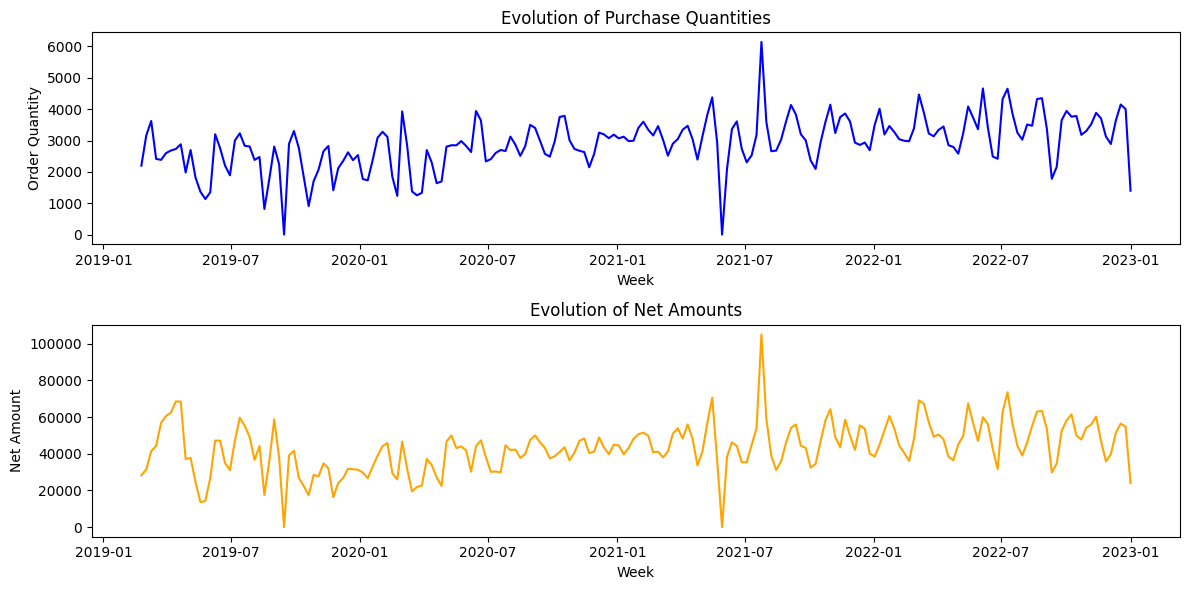

In [8]:
weekly_data = po.resample('W').agg({'OrderQty': 'sum', 'NetAmount': 'sum'})

# Create two separate line charts
plt.figure(figsize=(12, 6))

# Line chart for Order Quantity
plt.subplot(2, 1, 1)
plt.plot(weekly_data.index, weekly_data['OrderQty'], color='blue')
plt.xlabel('Week')
plt.ylabel('Order Quantity')
plt.title('Evolution of Purchase Quantities')

# Line chart for Net Amount
plt.subplot(2, 1, 2)
plt.plot(weekly_data.index, weekly_data['NetAmount'], color='orange')
plt.xlabel('Week')
plt.ylabel('Net Amount')
plt.title('Evolution of Net Amounts')

plt.tight_layout()  # Adjust layout spacing
plt.show()

### Critical suppliers

In [9]:
'''Deux façons de faire une jointure, soit avec merge() mais les index sont réinitialisé ou avec join() les index sont conservés
po_items = pd.merge(po, items, on="Ref"). Dans notre cas nous allons utiliser join() pour conserver les dates comme index'''

po_items = po.reset_index()\
    .merge(items, on="Ref")\
    .set_index("OrderDate")

po_items

,Ref,DeliveryDate,OrderQty,DeliveryQty,NetAmount,IsClosed,PONumber,Supplier,BuyPrice,SellPrice,Category,Brand,margin
OrderDate,,,,,,,,,,,,,
2019-02-23,15416092,2001-01-01,28,0,282,False,P-0249500216,RRD,22.15,37.880,Footwear,OIC,15.730
2019-02-23,15416092,2019-03-18,32,32,324,True,P-0249500216,RRD,22.15,37.880,Footwear,OIC,15.730
2019-02-23,15416092,2019-03-21,22,22,220,True,P-0249500216,RRD,22.15,37.880,Footwear,OIC,15.730
2019-03-02,15416092,2019-03-23,31,31,210,True,P-0250200227,RRD,22.15,37.880,Footwear,OIC,15.730
2019-03-02,15416092,2019-03-31,21,24,140,True,P-0250200227,RRD,22.15,37.880,Footwear,OIC,15.730
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-11,14367353,2022-06-19,163,65,6182,True,P-0369900133,Thundra,42.20,55.601,Footwear,La Sportiva,13.401
2022-06-18,14367353,2022-07-27,168,168,6449,True,P-0370600117,Thundra,42.20,55.601,Footwear,La Sportiva,13.401
2022-12-31,14367353,2001-01-01,160,160,5711,False,P-0390200060,Thundra,42.20,55.601,Footwear,La Sportiva,13.401


In [10]:
'''import plotly.express as px
suppliers_TNA = po_items.groupby("Supplier").agg({"NetAmount":"sum"}).reset_index()
suppliers_TNA['Percentage'] = (suppliers_TNA['NetAmount'] / suppliers_TNA['NetAmount'].sum()) * 100
fig = px.treemap(suppliers_TNA, path=["Supplier"], values="NetAmount", hover_data={"NetAmount": ":,.2f"})
fig.show()'''
import plotly.graph_objects as go
suppliers_TNA = po_items.groupby("Supplier").agg({"NetAmount":"sum"}).reset_index()
suppliers_TNA['Percentage'] = (suppliers_TNA['NetAmount'] / suppliers_TNA['NetAmount'].sum()) * 100
fig = go.Figure(go.Treemap(
    labels=suppliers_TNA['Supplier'],
    parents=['']*len(suppliers_TNA),
    values=suppliers_TNA['NetAmount'],
    textinfo='label+value+percent entry',
    hoverinfo='skip'
))

fig.show()

In [11]:
data = po_items.reset_index().merge(suppliers, on="Supplier").set_index("OrderDate")
data

,Ref,DeliveryDate,OrderQty,DeliveryQty,NetAmount,IsClosed,PONumber,Supplier,BuyPrice,SellPrice,Category,Brand,margin,Leadtime
OrderDate,,,,,,,,,,,,,,
2019-02-23,15416092,2001-01-01,28,0,282,False,P-0249500216,RRD,22.15,37.8800,Footwear,OIC,15.7300,60
2019-02-23,15416092,2019-03-18,32,32,324,True,P-0249500216,RRD,22.15,37.8800,Footwear,OIC,15.7300,60
2019-02-23,15416092,2019-03-21,22,22,220,True,P-0249500216,RRD,22.15,37.8800,Footwear,OIC,15.7300,60
2019-03-02,15416092,2019-03-23,31,31,210,True,P-0250200227,RRD,22.15,37.8800,Footwear,OIC,15.7300,60
2019-03-02,15416092,2019-03-31,21,24,140,True,P-0250200227,RRD,22.15,37.8800,Footwear,OIC,15.7300,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-17,16089695,2001-01-01,269,269,780,False,P-0388800169,TalonCotex,3.44,4.6735,Footwear,Tennsco,1.2335,20
2022-12-24,16089695,2001-01-01,34,34,100,False,P-0389500154,TalonCotex,3.44,4.6735,Footwear,Tennsco,1.2335,20
2022-12-24,16089695,2001-01-01,302,302,893,False,P-0389500154,TalonCotex,3.44,4.6735,Footwear,Tennsco,1.2335,20


In [12]:
# Filtrer les données pour l'année 2022
data_2022 = data[data.index.year == 2022]
df=data.reset_index()
data["RealLeadtime"] = [df.loc[i,"DeliveryDate"]-df.loc[i,"OrderDate"] for i in list(df.index)]
data["RealLeadtime"] = data["RealLeadtime"].apply(lambda x: x.days if x.days>0 else 0) 
# Grouper et agréger les données au niveau du fournisseur
aggregated_data = data.groupby('Supplier').agg({
    'PONumber': 'nunique',            # Total Number of POs
    'OrderQty': 'sum',                 # Total Quantity
    'NetAmount':'sum',              # Total Net Amount
    # 'NetAmount': lambda x: x[data_2022.index].sum(),  # Net Amount for year 2022
    'Ref': 'nunique',                   # Number of Distinct Items Purchased
    'BuyPrice': 'mean',                # Average Buy Price
    'IsClosed': lambda x: (~x).sum(),  # Number of Current Open POs
    'DeliveryQty': 'sum',              # Current Stock On Order Quantities
    'Leadtime': 'max',                 # Announced Supplier Leadtime
    'RealLeadtime': 'mean'             # Average Supplier Leadtime
})

# Renommer les colonnes pour plus de clarté
aggregated_data.rename(columns={
    'PONumber': 'Total Number of POs',
    'OrderQty': 'Total Quantity',
    'NetAmount': 'Total Net Amount',
    'Ref': 'Number of Distinct Items Purchased',
    'BuyPrice': 'Average Buy Price',
    'IsClosed': 'Number of Current Open POs',
    'DeliveryQty': 'Current Stock On Order Quantities',
    'RealLeadtime': 'Average Supplier Leadtime'
}, inplace=True)

# Trier les données par Total Net Amount en ordre décroissant
aggregated_data = aggregated_data.sort_values(by='Total Net Amount', ascending=False)

aggregated_data

,Total Number of POs,Total Quantity,Total Net Amount,Number of Distinct Items Purchased,Average Buy Price,Number of Current Open POs,Current Stock On Order Quantities,Leadtime,Average Supplier Leadtime
Supplier,,,,,,,,,
TalonCotex,200,273796,2849004,21,22.701801,314,266991,20,25.231024
Thundra,395,120491,1847977,33,27.682759,392,117427,35,29.316311
FHL,197,65371,1045648,14,28.907151,221,63183,40,28.842349
SuperSupply,195,41839,1022395,11,29.422125,170,39834,50,35.119458
Office First,201,45938,915369,10,22.958222,164,44406,45,28.522093
RRD,201,27605,532106,10,24.678238,220,26199,60,36.860229
Lokad,194,13628,520601,6,56.236471,78,13365,40,35.378886


### Critical items

In [13]:
# Filtrer les données pour l'année 2022
data_2022 = data[data.index.year == 2022]

df=data.reset_index()
data["RealLeadtime"] = [df.loc[i,"DeliveryDate"]-df.loc[i,"OrderDate"] for i in list(df.index)]

data["RealLeadtime"] = data["RealLeadtime"].apply(lambda x: x.days if x.days>0 else 0) 

# Grouper et agréger les données au niveau du fournisseur
aggregated_data = data.groupby('Ref').agg({
    'PONumber': 'nunique',            # Total Number of POs
    'OrderQty': 'sum',                 # Total Quantity
    'NetAmount': 'sum',                # Total Net Amount
    'BuyPrice': 'mean',                # Average Buy Price
    'IsClosed': lambda x: (~x).sum(),  # Number of Current Open POs
    'DeliveryQty': 'sum',              # Current Stock On Order Quantities
    'Leadtime': 'max',                 # Announced Supplier Leadtime
    'RealLeadtime': 'mean'               # Average Supplier Leadtime
})

# Renommer les colonnes pour plus de clarté
aggregated_data.rename(columns={
    'PONumber': 'Total Number of POs',
    'OrderQty': 'Total Quantity',
    'NetAmount': 'Total Net Amount',
    'BuyPrice': 'Average Buy Price',
    'IsClosed': 'Number of Current Open POs',
    'DeliveryQty': 'Current Stock On Order Quantities',
    'RealLeadtime': 'Average Supplier Leadtime'
}, inplace=True)

# Trier les données par Total Net Amount en ordre décroissant
aggregated_data = aggregated_data.sort_values(by='Total Net Amount', ascending=False).reset_index()[:20]

aggregated_data.merge(items[["Ref","Supplier"]],on="Ref")

,Ref,Total Number of POs,Total Quantity,Total Net Amount,Average Buy Price,Number of Current Open POs,Current Stock On Order Quantities,Leadtime,Average Supplier Leadtime,Supplier
0,15149291,165,50775,1115840,24.96,14,49953,20,21.693811,TalonCotex
1,14901389,157,24181,660998,31.23,16,23498,20,21.240310,TalonCotex
2,16401974,168,10225,341772,38.99,28,9780,45,27.991404,Office First
3,16089695,172,104956,317249,3.44,26,102226,20,26.078804,TalonCotex
4,11788268,163,5362,289322,63.65,21,5020,50,34.795139,SuperSupply
5,15963625,197,9350,235206,29.45,26,9143,35,29.323671,Thundra
6,15880950,186,8817,203557,26.95,36,8345,60,37.547980,RRD
7,11711150,145,3021,188251,74.73,12,2967,40,34.995745,Lokad
8,9952426,164,3456,182673,64.38,18,3376,40,29.293160,FHL
9,10014552,137,27932,179841,7.37,16,26634,40,28.491597,FHL


### Conclusion 1
### Trend
CM seems to be on a **positive trend**, as purchases have been constantly increasing since early 2020. Of course, to confirm this assumption, we would need to do a Sales Analysis as well, to make sure the total generated turnover / margin is on the same trend.
### Critical suppliers
CM seems quite dependent on 2 suppliers, **TalonCotex** and **Thundra**. When a company relies on a few suppliers, any disruption in their supply chains can cause significant problems. For example, if one of the suppliers’ experiences production problems or goes out of business, it can lead to delays in receiving critical materials or parts, which can result in missed deadlines, lost sales, and damaged customer relationships. Relying on a small number of suppliers also makes CM vulnerable to price volatility: it will be harder to negotiate low prices if there is no competition between suppliers.

## Part 2 : Limitations of basic analysis and risks to consider
### Financial profitability

In [14]:
sup_group = data.groupby(["Supplier","Category","Brand","Ref"])["NetAmount","DeliveryQty"].sum().reset_index()
sup_group = sup_group.merge(items[["Ref","margin"]],on="Ref")
sup_group["TotalMargin"] = sup_group["margin"]*sup_group["DeliveryQty"]
sup_group

C:\Users\ouroa\AppData\Local\Temp\ipykernel_10700\3831654303.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Supplier,Category,Brand,Ref,NetAmount,DeliveryQty,margin,TotalMargin
0,FHL,Climbing,Anderson,16188573,120214,7336,17.8100,130654.1600
1,FHL,Footwear,Ampad,12561507,67108,2586,24.2000,62581.2000
2,FHL,Footwear,Avery,10136626,53064,1578,44.5400,70284.1200
3,FHL,Footwear,Avery,12572752,76918,1800,30.8800,55584.0000
4,FHL,Footwear,Avery,12703703,22529,1839,16.3600,30086.0400
...,...,...,...,...,...,...,...,...
100,Thundra,Jackets,Logitech,11906239,56658,2069,13.7735,28497.3715
101,Thundra,Jackets,MicroTAC,16363786,136786,6610,10.4585,69130.6850
102,Thundra,Jackets,Panasonic,13474623,298,10,-2.5560,-25.5600
103,Thundra,Jackets,U.S.,11941800,171416,7754,2.9035,22513.7390


In [15]:
sup_group.groupby("Supplier")["NetAmount","TotalMargin"].sum().sort_values(by="TotalMargin",ascending=False)

C:\Users\ouroa\AppData\Local\Temp\ipykernel_10700\190867997.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,NetAmount,TotalMargin
Supplier,,
SuperSupply,1022395,1882020.765
FHL,1045648,1166019.400
Office First,915369,909541.054
TalonCotex,2849004,763015.985
Thundra,1847977,630978.439
RRD,532106,500821.860
Lokad,520601,383944.690


### Catalog Diversity/Assortment

In [16]:
sup_group.groupby("Supplier").agg({
    "DeliveryQty" : "sum",
    "Ref" : "nunique",
    "Category" : "nunique",
    "Brand" : "nunique"
}).sort_values(by="Ref",ascending=False)

,DeliveryQty,Ref,Category,Brand
Supplier,,,,
Thundra,117427,33,3,15
TalonCotex,266991,21,3,13
FHL,63183,14,3,8
SuperSupply,39834,11,3,8
Office First,44406,10,2,8
RRD,26199,10,3,6
Lokad,13365,6,2,5


### Supplier leadtime

In [17]:
data

,Ref,DeliveryDate,OrderQty,DeliveryQty,NetAmount,IsClosed,PONumber,Supplier,BuyPrice,SellPrice,Category,Brand,margin,Leadtime,RealLeadtime
OrderDate,,,,,,,,,,,,,,,
2019-02-23,15416092,2001-01-01,28,0,282,False,P-0249500216,RRD,22.15,37.8800,Footwear,OIC,15.7300,60,0
2019-02-23,15416092,2019-03-18,32,32,324,True,P-0249500216,RRD,22.15,37.8800,Footwear,OIC,15.7300,60,23
2019-02-23,15416092,2019-03-21,22,22,220,True,P-0249500216,RRD,22.15,37.8800,Footwear,OIC,15.7300,60,26
2019-03-02,15416092,2019-03-23,31,31,210,True,P-0250200227,RRD,22.15,37.8800,Footwear,OIC,15.7300,60,21
2019-03-02,15416092,2019-03-31,21,24,140,True,P-0250200227,RRD,22.15,37.8800,Footwear,OIC,15.7300,60,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-17,16089695,2001-01-01,269,269,780,False,P-0388800169,TalonCotex,3.44,4.6735,Footwear,Tennsco,1.2335,20,0
2022-12-24,16089695,2001-01-01,34,34,100,False,P-0389500154,TalonCotex,3.44,4.6735,Footwear,Tennsco,1.2335,20,0
2022-12-24,16089695,2001-01-01,302,302,893,False,P-0389500154,TalonCotex,3.44,4.6735,Footwear,Tennsco,1.2335,20,0


In [18]:
# Filtrer les lignes où IsClosed est True, car vous ne voulez afficher que les articles achetés
PO_closed = data[data['IsClosed'] == True]

# Si la commande est en retard ou non
PO_closed['IsLate'] = PO_closed.apply(lambda row: (row['Leadtime'] < row['RealLeadtime']), axis=1)

# Calculer la différence pondéré relative par rapport au délai annoncé
PO_closed['Relative Diff to Announced Leadtime'] =(PO_closed["DeliveryQty"]*(PO_closed['RealLeadtime'] - PO_closed['Leadtime']))

# Grouper les données par la référence (Ref) de l'article
grouped_data = PO_closed.groupby(['Ref','Supplier']).agg({
    'NetAmount': 'sum',               # Total Purchased Amount
    'Leadtime': 'first',             # Announced Supplier Leadtime (en supposant que c'est la même pour chaque article)
    'RealLeadtime': ['mean', "median", 'min', 'max'],    # Avg Leadtime, Min Leadtime, Max Leadtime
    'Relative Diff to Announced Leadtime': 'mean',        
    'IsClosed': 'count',             # Count Closed POs
    'IsLate': lambda x: x.sum()
})

# Renommer les colonnes pour plus de clarté
grouped_data.columns = ['Total Purchased Amount', 'Announced Supplier Leadtime', 'Avg Leadtime', 'Median Leadtime','Min Leadtime', 'Max Leadtime','Avg Relative Diff to Announced Leadtime', 'Count Closed POs',"Count Late"]

# Calculer la proportion de retards (Late Deliveries)
grouped_data['Proportion of Late Deliveries (%)'] = 100*grouped_data["Count Late"]/grouped_data["Count Closed POs"]



# Afficher la table résultante au niveau de l'article
grouped_data.sort_values(by=['Total Purchased Amount'], ascending=False)[:20]


C:\Users\ouroa\AppData\Local\Temp\ipykernel_10700\539448595.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ouroa\AppData\Local\Temp\ipykernel_10700\539448595.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,,Total Purchased Amount,Announced Supplier Leadtime,Avg Leadtime,Median Leadtime,Min Leadtime,Max Leadtime,Avg Relative Diff to Announced Leadtime,Count Closed POs,Count Late,Proportion of Late Deliveries (%)
Ref,Supplier,,,,,,,,,,
15149291,TalonCotex,1061860,20,22.730375,30.0,15,30,491.757679,293,151,51.535836
14901389,TalonCotex,619549,20,22.644628,40.0,5,40,181.136364,242,122,50.413223
16401974,Office First,315737,45,30.433022,31.0,10,50,-432.978193,321,37,11.526480
16089695,TalonCotex,292060,20,28.061404,24.0,15,59,2151.283626,342,242,70.760234
11788268,SuperSupply,275590,50,37.531835,38.0,25,50,-234.464419,267,0,0.000000
15963625,Thundra,218635,35,31.288660,31.0,2,60,-98.391753,388,167,43.041237
15880950,RRD,183269,60,41.302778,41.0,10,70,-389.180556,360,69,19.166667
9952426,FHL,174222,40,31.117647,31.0,22,40,-102.498270,289,0,0.000000
11711150,Lokad,174142,40,36.878924,37.0,15,60,-48.529148,223,90,40.358744


### Defect rate on supplier deliveries (missing quantities in purchase orders)

In [19]:
# fonction qui calcule combien manque
def missing(row):
    if row["OrderQty"]>row["DeliveryQty"]:
        return row["OrderQty"]-row["DeliveryQty"]
    else:
        return 0
    
PO_closed['Incomplete'] = PO_closed.apply(lambda row: row["OrderQty"]>row["DeliveryQty"], axis=1)
PO_closed['MissingQty'] = PO_closed.apply(missing, axis=1)


# Group the data by 'Supplier'
grouped_data = PO_closed.groupby('Supplier').agg({
    'DeliveryQty': 'count',                # Number of Deliveries
    'Incomplete': lambda x: x.sum(),       # Number of Incomplete Deliveries (assuming you have the 'IsLate' column)
    'MissingQty': ['sum','mean','max']    # Total missing Quantities
})

grouped_data.columns = ['Number of Deliveries','Number of incomplete deliveries','Total missing Qty','Average missing Qty','Largest incomplete delivery']
grouped_data["Incomplete Deliveries (%)"] = 100*grouped_data['Number of incomplete deliveries']/grouped_data['Number of Deliveries']

grouped_data.sort_values(by='Total missing Qty',ascending=False)

C:\Users\ouroa\AppData\Local\Temp\ipykernel_10700\3673558514.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ouroa\AppData\Local\Temp\ipykernel_10700\3673558514.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Number of Deliveries,Number of incomplete deliveries,Total missing Qty,Average missing Qty,Largest incomplete delivery,Incomplete Deliveries (%)
Supplier,,,,,,
TalonCotex,5127,210,5958,1.162083,418,4.095963
Thundra,6677,263,2810,0.420848,202,3.938895
FHL,3236,133,2013,0.622064,218,4.110012
SuperSupply,2559,136,1765,0.689723,70,5.314576
Office First,2416,119,1381,0.571606,53,4.925497
RRD,2141,78,537,0.250817,40,3.643157
Lokad,1305,41,227,0.173946,24,3.141762


### Data inconsistency

In [20]:
# deliveries (older than 1 year) that are still undelivered
df[(df["IsClosed"]==False) & (df['OrderDate'].dt.year==2022)]

,OrderDate,Ref,DeliveryDate,OrderQty,DeliveryQty,NetAmount,IsClosed,PONumber,Supplier,BuyPrice,SellPrice,Category,Brand,margin,Leadtime,RealLeadtime
247,2022-07-16,15416092,2001-01-01,2,2,34,False,P-0373400119,RRD,22.15,37.8800,Footwear,OIC,15.7300,60,0
249,2022-07-23,15416092,2001-01-01,4,4,67,False,P-0374100094,RRD,22.15,37.8800,Footwear,OIC,15.7300,60,0
251,2022-08-06,15416092,2001-01-01,7,7,134,False,P-0375500128,RRD,22.15,37.8800,Footwear,OIC,15.7300,60,0
255,2022-08-20,15416092,2001-01-01,7,7,133,False,P-0376900153,RRD,22.15,37.8800,Footwear,OIC,15.7300,60,0
256,2022-08-20,15416092,2001-01-01,2,3,34,False,P-0376900153,RRD,22.15,37.8800,Footwear,OIC,15.7300,60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25015,2022-12-17,16089695,2001-01-01,269,269,780,False,P-0388800169,TalonCotex,3.44,4.6735,Footwear,Tennsco,1.2335,20,0
25016,2022-12-24,16089695,2001-01-01,34,34,100,False,P-0389500154,TalonCotex,3.44,4.6735,Footwear,Tennsco,1.2335,20,0
25017,2022-12-24,16089695,2001-01-01,302,302,893,False,P-0389500154,TalonCotex,3.44,4.6735,Footwear,Tennsco,1.2335,20,0
25018,2022-12-24,16089695,2001-01-01,739,739,2183,False,P-0389500154,TalonCotex,3.44,4.6735,Footwear,Tennsco,1.2335,20,0


In [21]:
# deliveries with quantity delivered higher than ordered quantity
data[data['DeliveryQty'] > data['OrderQty']]

,Ref,DeliveryDate,OrderQty,DeliveryQty,NetAmount,IsClosed,PONumber,Supplier,BuyPrice,SellPrice,Category,Brand,margin,Leadtime,RealLeadtime
OrderDate,,,,,,,,,,,,,,,
2019-03-02,15416092,2019-03-31,21,24,140,True,P-0250200227,RRD,22.15,37.88,Footwear,OIC,15.73,60,29
2020-08-22,15416092,2020-09-16,2,3,27,True,P-0304100130,RRD,22.15,37.88,Footwear,OIC,15.73,60,25
2021-01-02,15416092,2021-03-05,2,3,28,True,P-0317400133,RRD,22.15,37.88,Footwear,OIC,15.73,60,62
2021-02-27,15416092,2021-04-08,2,3,29,True,P-0323000129,RRD,22.15,37.88,Footwear,OIC,15.73,60,40
2021-03-06,15416092,2021-03-20,3,4,57,True,P-0323700120,RRD,22.15,37.88,Footwear,OIC,15.73,60,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-24,10255812,2021-05-11,14,16,94,True,P-0328600105,RRD,8.00,20.86,Footwear,Fellowes,12.86,60,17
2021-10-02,10255812,2021-11-08,14,16,98,True,P-0344700131,RRD,8.00,20.86,Footwear,Fellowes,12.86,60,37
2021-11-20,10255812,2021-12-04,7,8,45,True,P-0349600135,RRD,8.00,20.86,Footwear,Fellowes,12.86,60,14


### Conclusion 2
### Financial profitability
While turnover can be a useful metric for measuring the size and scale of a business, it is financial profitability that indicates whether a business is sustainable and profitable in the long run. A business can have a high turnover but still be unprofitable if its expenses and costs are too high relative to its revenue.

Profitability is essential for a business’s survival and growth as it provides the resources needed to invest in new products, hire more employees, expand to new markets, and pay dividends to shareholders. In contrast, a business with a high turnover but low profitability may struggle to compete with other businesses in the long run, especially during economic downturns or market disruptions. Of course, sacrificing margin on some items which will be loss leaders can sometimes be an efficient sales strategy to attract customers, but it cannot be applied to your whole product catalog.

From a financial perspective, we can state that **SuperSupply** and **FHL** actually are the most critical suppliers for CM.

### Assortment
Working with suppliers with a wide range of products can simplify logistics and reduce administrative tasks. Consolidating purchases from one supplier can also help to reduce costs, as it may be possible to negotiate better pricing based on the volume of purchases. The variety of assortment is also a critical factor for a company as a catalog with too few items is not attractive from a customer point of view. As such, suppliers such as **SuperSupply** and **RRD** are also critical for CM.

### Supplier Leadtime and Defect Rate variability
Variability in supplier leadtimes can result in unexpected wait times for inventory, which can cause stockouts or even excess inventory (if you receive stock units too late to serve an order). This can result in lost sales, a degradation of customer relations and increased carrying costs. Ignoring the fact that supplier leadtimes are highly variable makes your inventory management process irrelevant. High supplier defect rates have the same effects, as defective stocks will have to be delivered again from the supplier and will therefore be delayed.

### Incomplete/Incoherent Data
Whenever data is manipulated in the process of supply chain management, data consistency checks must be done (before everything else) to ensure your data analysis reflects the operational reality. Ensuring the accuracy of data is absolutely imperative for drawing valid conclusions from a quantitative analysis. Neglecting this aspect is a frequent mistake that can lead to erroneous decision-making and misdirection. If errors or inconsistencies are found in the data, additional investigation must take place to understand what the root problem is and correct the data generation process.

## Part 3: Additional More In-Depth Observations

In [22]:
#Leadtime variability
target_item = df[df["Ref"]=='10592438']
target_item

,OrderDate,Ref,DeliveryDate,OrderQty,DeliveryQty,NetAmount,IsClosed,PONumber,Supplier,BuyPrice,SellPrice,Category,Brand,margin,Leadtime,RealLeadtime
24069,2019-03-09,10592438,2019-03-28,41,41,66,True,P-0250900172,TalonCotex,3.44,4.485,Footwear,Presstex,1.045,20,19
24070,2019-03-09,10592438,2019-03-29,41,41,66,True,P-0250900172,TalonCotex,3.44,4.485,Footwear,Presstex,1.045,20,20
24071,2019-03-09,10592438,2019-04-08,41,41,66,True,P-0250900172,TalonCotex,3.44,4.485,Footwear,Presstex,1.045,20,30
24072,2019-05-04,10592438,2019-05-26,21,21,66,True,P-0256500074,TalonCotex,3.44,4.485,Footwear,Presstex,1.045,20,22
24073,2019-05-11,10592438,2019-05-27,21,21,67,True,P-0257200037,TalonCotex,3.44,4.485,Footwear,Presstex,1.045,20,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24406,2022-12-17,10592438,2001-01-01,101,101,293,False,P-0388800169,TalonCotex,3.44,4.485,Footwear,Presstex,1.045,20,0
24407,2022-12-24,10592438,2001-01-01,34,34,100,False,P-0389500154,TalonCotex,3.44,4.485,Footwear,Presstex,1.045,20,0
24408,2022-12-24,10592438,2001-01-01,34,34,100,False,P-0389500154,TalonCotex,3.44,4.485,Footwear,Presstex,1.045,20,0
24409,2022-12-24,10592438,2001-01-01,135,135,397,False,P-0389500154,TalonCotex,3.44,4.485,Footwear,Presstex,1.045,20,0


Text(0.5, 1.0, 'Leadtime of item 10592438')

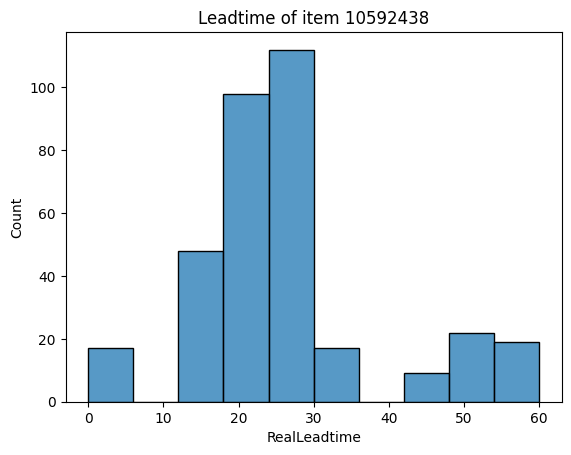

In [23]:
sns.histplot(target_item['RealLeadtime'],bins=10)
plt.title("Leadtime of item 10592438")

Text(0.5, 1.0, 'Total leadtime by month')

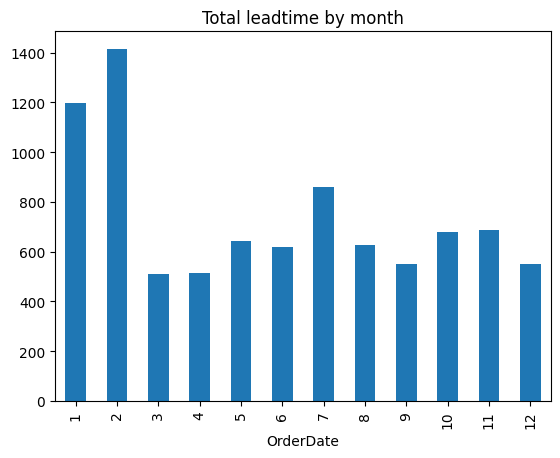

In [24]:
# Leadtime seasonality
target_item.groupby([target_item["OrderDate"].dt.month])['RealLeadtime'].sum().plot(kind='bar')
plt.title("Total leadtime by month")

Text(0.5, 1.0, 'Defect rate')

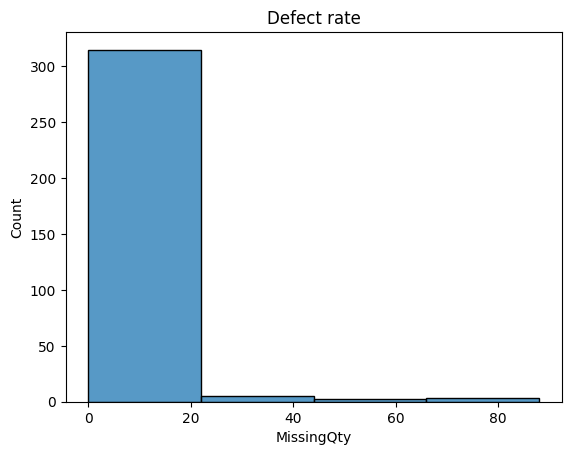

In [25]:
# Defect rate variability
sns.histplot(PO_closed[PO_closed['Ref']=="10592438"]["MissingQty"],bins=4)
plt.title("Defect rate")

### To go further - Handling Leadtime Variability as a Purchase Planner

Display the Suppler Leadtime distribution for Item 13336372 in a scalar tile.
CM has to serve a special order of one pallet of Item 13336372. If we consider the following inputs, how many days before the client’s requested date should CM place the order to its supplier? Use table “PossibleAnswers” already created in the script.
Stock Cost: $8/day from the moment the order is received to the moment it is delivered

Late Delivery Cost: $13/day after client’s requested date

Delivery from CM to the customer can be done on the same day CM receives the order from its supplier (no delivery time)

In [26]:
target_item = df[df["Ref"]=='13336372']
target_item

,OrderDate,Ref,DeliveryDate,OrderQty,DeliveryQty,NetAmount,IsClosed,PONumber,Supplier,BuyPrice,SellPrice,Category,Brand,margin,Leadtime,RealLeadtime
12007,2020-01-25,13336372,2020-02-08,8,8,211,True,P-0283100140,Office First,24.448,56.51,Jackets,AT&T,32.062,45,14
12008,2020-02-08,13336372,2020-03-13,2,2,53,True,P-0284500164,Office First,24.448,56.51,Jackets,AT&T,32.062,45,34
12009,2020-02-15,13336372,2020-03-06,2,2,52,True,P-0285200133,Office First,24.448,56.51,Jackets,AT&T,32.062,45,20


Text(0.5, 1.0, 'Leadtime of item 13336372')

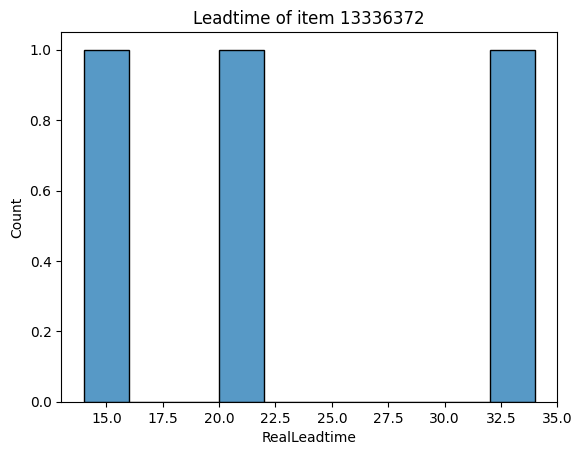

In [27]:
sns.histplot(target_item['RealLeadtime'],bins=10)
plt.title("Leadtime of item 13336372")

Text(0.5, 1.0, 'Total leadtime by month')

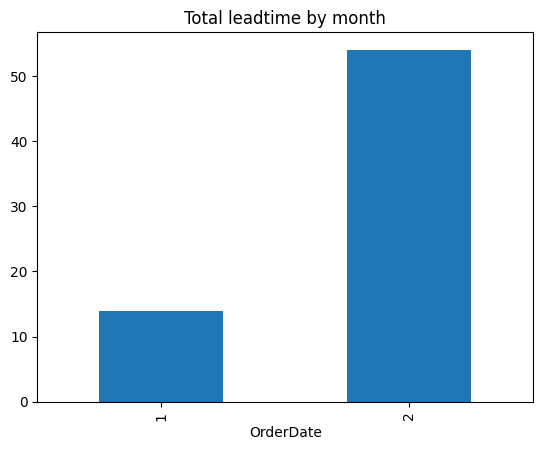

In [28]:
# Leadtime seasonality
target_item.groupby([target_item["OrderDate"].dt.month])['RealLeadtime'].sum().plot(kind='bar')
plt.title("Total leadtime by month")

### Conclusion of the Supplier Analysis
### Choose your suppliers wisely
There is a good balance to find between too few suppliers on which CM would be too dependent, and too many suppliers that would be a nightmare to handle all at once. When deciding on which suppliers to order from, several angles like purchase prices, catalog variety (assortment), product quality and leadtimes must be considered. Of course, CM should always be evaluating the performance of its suppliers to ensure they remain the best choice available on the market for their needs.

### Risk must always be assessed
Considering all uncertainties is crucial when managing your supply chain. A naive process based only on theoretical inputs will have no chance to succeed in a globalized world impacted by infinite variabilities. For instance, trusting a supplier will always respect their leadtimes may appear as a solution to save on purchased quantities, but as we observed during this workshop, not assessing the risk of delays could cost CM a lot.

### Consider the right metrics to evaluate economic gain
As we saw in this analysis, the suppliers from which CM purchases the most are not the ones from which CM is expecting to make the best profit. Volume is not always correlated with economic profitability, which can depend on several factors and must always be challenged to ensure the company is working towards increasing margin and not only turnover. A company with a high turnover but negative margins is doomed to failure.